## Problem Statement

On April 15, 1912, the HMS Titanic sank, resulting in the death of the majority of passengers and crew members. The goal is to take what information is known about the passengers aboard the Titanic and construct a classification model to predict who was most likely to survive and who would likely perish.

In [2]:
# data preparating and visualizing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# metrics for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

# tuning the model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [3]:
# importing the data sets
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
df_gender = pd.read_csv('../input/titanic/gender_submission.csv')

Our data is divided into training and test sets already. The features and labels will be moved into separate dataframes and features which are not likely to be helpful are dropped.

In [4]:
# creating train dataset
df2 = df_train.copy()
# imputing na values
df2.Age[df2.Age.isna()] = df2.Age.mean()
# separating x_train and y_train
df3 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df3_label = df3.Survived
df3_features = df3.drop(['Survived'], axis=1)
X_train = pd.get_dummies(df3_features)
y_train = df3_label.copy()

In [5]:
# creating test dataset
df2 = pd.concat([df_test, df_gender.drop(['PassengerId'], axis=1)], axis=1)
# imputing na values
df2.Age[df2.Age.isna()] = df2.Age.mean()
df2.Fare[df2.Fare.isna()] = df2.Fare.mean()
# separating x_test and y_test
df3 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df3_label = df3.Survived
df3_features = df3.drop(['Survived'], axis=1)
X_test = pd.get_dummies(df3_features)
y_test = df3_label.copy()

In [6]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels= ['Perished', 'Survived'], yticklabels= ['Perished', 'Survived'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    plt.show()

## Modeling Building

We will test several classification models and see which performs the best.

### Logistic Regression

A logistic regression will attempt to build a model which fits the data along a sigmoid curve. This type of model is ideal for binary classification problems such as this.

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



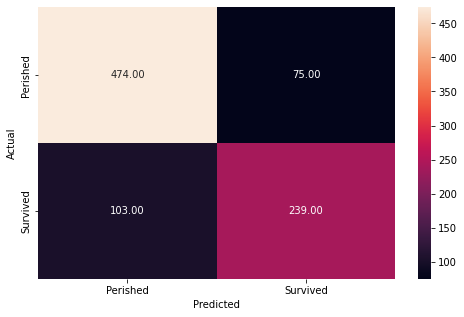

In [8]:
# testing model performance on the training set
y_train_pred_lr = lr.predict(X_train)
metrics_score(y_train, y_train_pred_lr)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.94      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



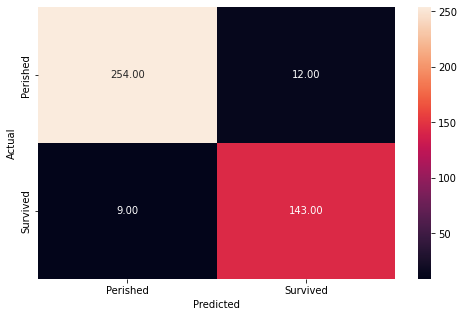

In [9]:
# testing model performance on the testing set
y_test_pred_lr = lr.predict(X_test)
metrics_score(y_test, y_test_pred_lr)

A simple linear regression has resulted in a model that is 95% accurate on the testing data set. Performance may be improved by tuning the model's hyperparameters

### Logistic Regression Hypertuning

In [10]:
lr_tuned = LogisticRegression()

parameters = {'penalty':['none', 'l1', 'l2', 'elasticnet'],
             'solver':['newton-cg', 'lbfs', 'liblinear', 'sag', 'saga'],
             'C':[1, 0.1, 0.001]}

scorer = metrics.make_scorer(accuracy_score, pos_label=1)

grid_obj = GridSearchCV(lr_tuned, parameters, scoring=scorer, cv=5, verbose=2)
grid_obj.fit(X_train, y_train)
lr_tuned = grid_obj.best_estimator_
lr_tuned

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ................C=1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ................C=1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ................C=1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ................C=1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ................C=1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....................C=1, penalty=none, solver=lbfs; total time=   0.0s
[CV] END .....................C=1, penalty=none, solver=lbfs; total time=   0.0s
[CV] END .....................C=1, penalty=none, solver=lbfs; total time=   0.0s
[CV] END .....................C=1, penalty=none, solver=lbfs; total time=   0.0s
[CV] END .....................C=1, penalty=none, solver=lbfs; total time=   0.0s
[CV] END ................C=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=none, sol

LogisticRegression(C=1, penalty='none', solver='newton-cg')

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



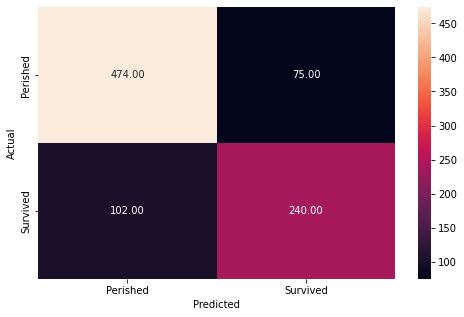

In [11]:
# testing model performance on the training set
y_train_pred_lr_tuned = lr_tuned.predict(X_train)
metrics_score(y_train, y_train_pred_lr_tuned)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.92      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



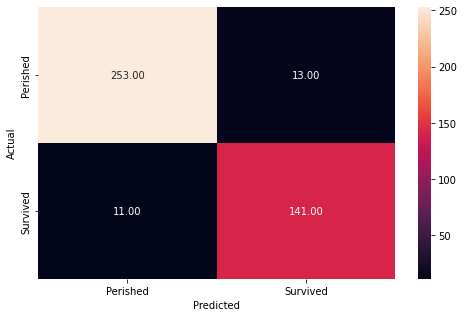

In [12]:
# testing model performance on the testing set
y_test_pred_lr_tuned = lr_tuned.predict(X_test)
metrics_score(y_test, y_test_pred_lr_tuned)

Hypertuning has not resulted in improved performance. In fact, the hypertuned model performs slightly worse on the testing set.

### Decision Trees

Decision trees attempt to divide a set of data in such a way as to maximize information gain. In other words, decision trees will try to separate a data set into groups based on the features it deems most important.

In [13]:
# training a decision tree model
dt = DecisionTreeClassifier(class_weight = {0:0.62, 1:0.38})
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.62, 1: 0.38})

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



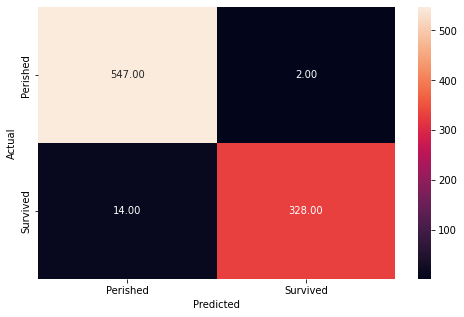

In [14]:
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       266
           1       0.70      0.70      0.70       152

    accuracy                           0.78       418
   macro avg       0.76      0.77      0.77       418
weighted avg       0.78      0.78      0.78       418



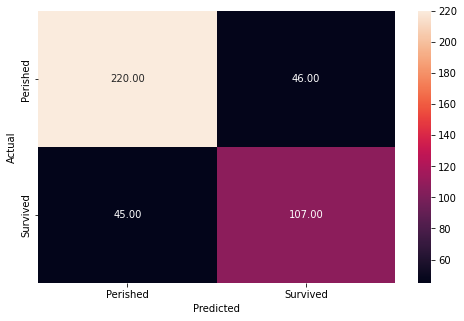

In [15]:
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

The decision tree model performs substantially worse than a logistic regression. Performance may be improved with hypertuning

### Decision Tree Hypertuning

In [16]:
# hyperparamter tuning
dt_tuned = DecisionTreeClassifier(class_weight={0:0.62, 1:0.38})

parameters = {'max_depth': np.arange(2, 10),
             'criterion': ['gini', 'entropy'],
             'min_samples_leaf': [5, 10, 15, 20]}

# scorer to be used to compare performance
scorer = metrics.make_scorer(accuracy_score, pos_label=1)

# grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=scorer, cv=10)

# fitting to training data
grid_obj.fit(X_train, y_train)

# saving the best parameters
dt_tuned = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       549
           1       0.91      0.52      0.66       342

    accuracy                           0.80       891
   macro avg       0.84      0.74      0.76       891
weighted avg       0.82      0.80      0.78       891



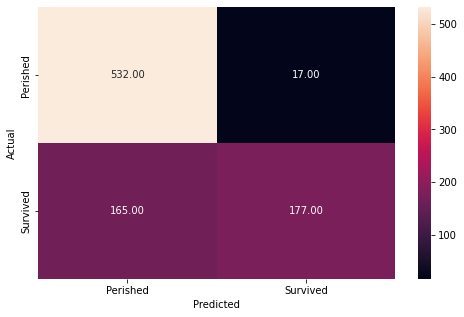

In [17]:
y_train_pred_dt_tuned = dt_tuned.predict(X_train)
metrics_score(y_train, y_train_pred_dt_tuned)

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       266
           1       0.91      0.53      0.67       152

    accuracy                           0.81       418
   macro avg       0.85      0.75      0.77       418
weighted avg       0.83      0.81      0.79       418



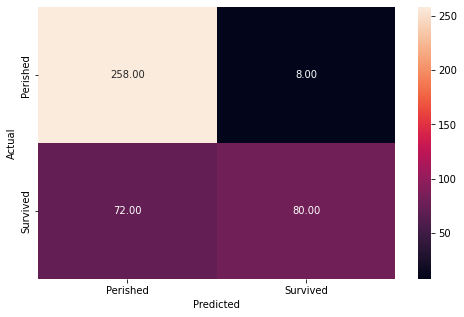

In [18]:
y_test_pred_dt_tuned = dt_tuned.predict(X_test)
metrics_score(y_test, y_test_pred_dt_tuned)

Hypertuning has resulted in a modest improvement to the performance of the decision tree, but it still does not perform as well as the logistic regression. Random forests may perform better.

### Random Forest

Random forests use bagging to produce multiple decision trees, each trained on a slightly different version of the original data set. By combining the output of these trees, a random forest can result in stronger performance than a single decision tree.

In [19]:
rt = RandomForestClassifier(class_weight={0:0.62, 1:0.38})
rt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.62, 1: 0.38})

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



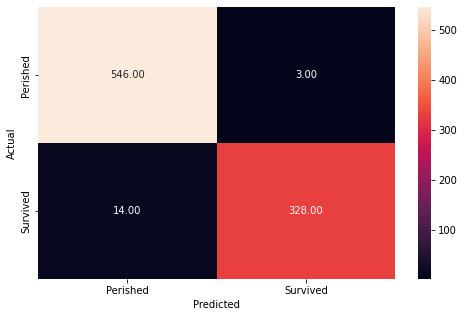

In [20]:
y_train_pred_rt = rt.predict(X_train)
metrics_score(y_train, y_train_pred_rt)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       266
           1       0.76      0.72      0.74       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.81      0.82      0.81       418



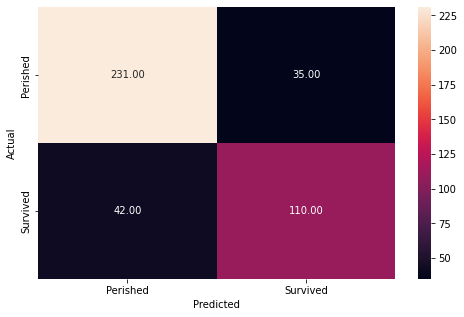

In [21]:
y_test_pred_rt = rt.predict(X_test)
metrics_score(y_test, y_test_pred_rt)

The random forest has not performed better, but hypertuning may help.

### Random Forest Hypertuning

In [22]:
# hyperparameter tuning
rf_tuned = RandomForestClassifier(class_weight={0:0.62, 1:0.38})

parameters = {'n_estimators': [100, 150, 200, 250],
             'min_samples_leaf': np.arange(2, 5),
             'max_features': [ 0.8, 0.9, 'auto'],
             'max_depth': np.arange(5, 8),
             'min_samples_split':[5, 10, 15]}

scorer = metrics.make_scorer(accuracy_score, pos_label=1)
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3)
grid_obj.fit(X_train, y_train)
rf_tuned = grid_obj.best_estimator_
print(rf_tuned)

RandomForestClassifier(class_weight={0: 0.62, 1: 0.38}, max_depth=5,
                       max_features=0.8, min_samples_leaf=2,
                       min_samples_split=5)


              precision    recall  f1-score   support

           0       0.82      0.97      0.89       549
           1       0.93      0.65      0.77       342

    accuracy                           0.85       891
   macro avg       0.87      0.81      0.83       891
weighted avg       0.86      0.85      0.84       891



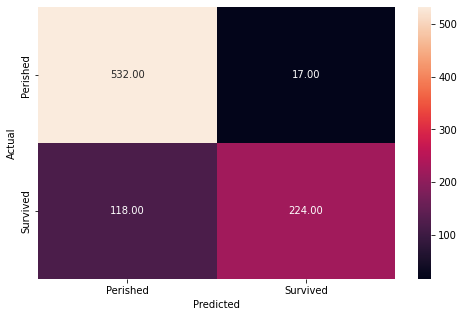

In [23]:
y_train_pred_rf_tuned = rf_tuned.predict(X_train)
metrics_score(y_train, y_train_pred_rf_tuned)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       266
           1       0.91      0.66      0.77       152

    accuracy                           0.85       418
   macro avg       0.87      0.81      0.83       418
weighted avg       0.86      0.85      0.85       418



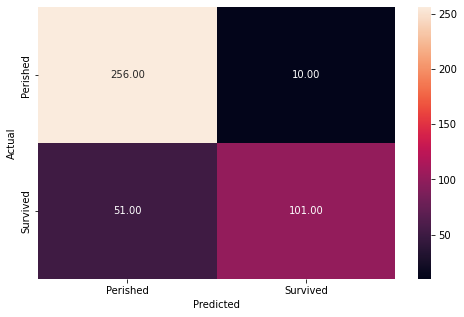

In [24]:
y_test_pred_rf_tuned = rf_tuned.predict(X_test)
metrics_score(y_test, y_test_pred_rf_tuned)

Hypertuning has improved performance, but the random forest hasn't performed better than our logistic regression. An ensemble approach may perform better.

### XGBoost

XGBoost is an ensemble machine learning model similar to random forests, but with a focus on generating multiple, weaker classification models that, when used together, produce stronger results.

In [25]:
xgb_tuned = xgb.XGBClassifier()

parameters = {'learning_rate':[0.001],
             'max_depth': np.arange(2, 10),
             'n_estimators': [100, 200, 300],
             'objective':['reg:logistic'],
             'alpha': np.arange(5, 10)}

scorer = metrics.make_scorer(recall_score, pos_label=1)

grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, verbose=1)

grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [26]:
xgb_tuned

XGBClassifier(alpha=5, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='reg:logistic',
              predictor='auto', random_state=0, ...)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.82      0.73      0.77       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.84      0.84      0.83       891



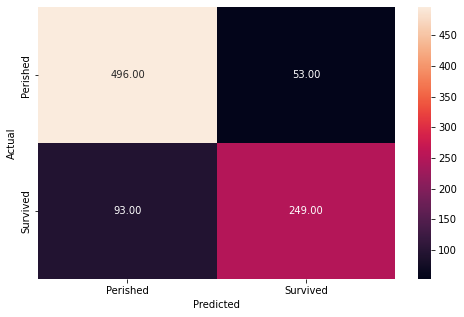

In [27]:
y_train_pred_xgb_tuned = xgb_tuned.predict(X_train)
metrics_score(y_train, y_train_pred_xgb_tuned)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       266
           1       0.93      0.94      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



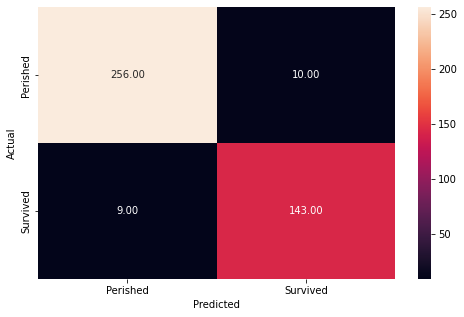

In [28]:
y_test_pred_xgb_tuned = xgb_tuned.predict(X_test)
metrics_score(y_test, y_test_pred_xgb_tuned)

The boosted model performed quite well, slightly better than the logistic regression. The accuracy of this final model is 0.95, meaning it missclassifies only 5% of passengers.

In [29]:
output = pd.DataFrame({'PassengerId':df_test['PassengerId'],
                          'Survived':y_test_pred_xgb_tuned})

output.to_csv('submission.csv', index=False)